<a href="https://colab.research.google.com/github/LAXMAN7795/Add-Watermarks-to-PDF/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)

In [ ]:
dataset.columns = df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Dependent and independent
X = dataset
y = df.target

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#cross validation : here we devide actual data internally and find the solution for internal divided datas finally combine all the solution(mean)
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
MSE = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
mean_MSE = np.mean(MSE)
print(mean_MSE)
print(MSE)

-0.5257104326777
[-0.56799593 -0.52918854 -0.48456478 -0.51627013 -0.54833859 -0.47884524
 -0.47828648 -0.55465187 -0.55647389 -0.54248888]


In [ ]:
reg_pred = regression.predict(X_test)
reg_pred

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

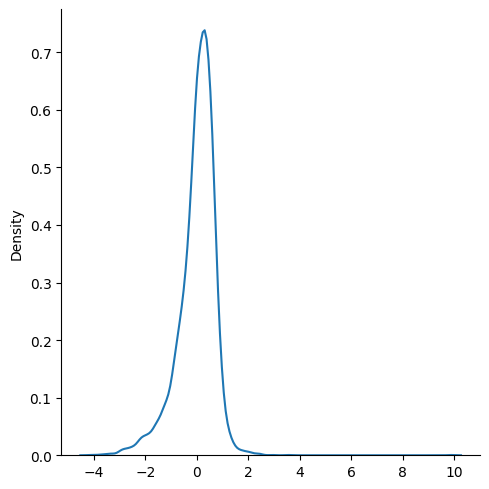

In [ ]:
sns.displot(reg_pred-y_test,kind='kde')

In [1]:
# 2nd Model for Lenear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# prompt: i want to create X and Y data and target

import pandas as pd
import numpy as np

# Sample data (replace with your actual data)
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [1.5, 3.7, 5.8, 7.1, 9.3]
}
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['X']]  # Features
y = df['Y']    # Target variable

print("X (features):\n", X)
print("\ny (target):\n", y)

X (features):
    X
0  1
1  2
2  3
3  4
4  5

y (target):
 0    1.5
1    3.7
2    5.8
3    7.1
4    9.3
Name: Y, dtype: float64


In [15]:
# prompt: i want to split the data

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

print("X_train_2 ", X_train_2)
print("y_train_2 ", y_train_2)
print("X_test_2 ", X_test_2)
print("y_test_2 ", y_test_2)

X_train_2     X
4  5
2  3
0  1
3  4
y_train_2  4    9.3
2    5.8
0    1.5
3    7.1
Name: Y, dtype: float64
X_test_2     X
1  2
y_test_2  1    3.7
Name: Y, dtype: float64


In [14]:
model = LinearRegression()  # Create the model ,Initializes the Linear Regression model but does not train it yet.

In [16]:
model.fit(X_train_2, y_train_2) #train the model
# Slope (m) = 2.03
# Intercept (b) = -0.53
# Why: The fit method computes the best-fit line by minimizing the error between predictions and actual values using the training data.

LinearRegression()

In [18]:
Y_pred = model.predict(X_test_2)  #Predict the test data
print(Y_pred)
# The model predicts the value of Y for X_test = 2 using the formula
# 𝑌 =𝑚𝑋+𝑏
# Y=mX+b. Substituting
# 𝑚=2.03 and 𝑏=−0.53
# Y=(2.03×2)+(−0.53)=3.53

array([3.52857143])

In [19]:
mse = mean_squared_error(y_test_2, Y_pred)
r2 = r2_score(y_test_2, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
#The Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. A smaller value indicates better accuracy.
#The R² Score indicates how well the model explains the variance in the data. A value close to 1 shows a good fit.

Mean Squared Error: 0.029387755102040607
R-squared: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


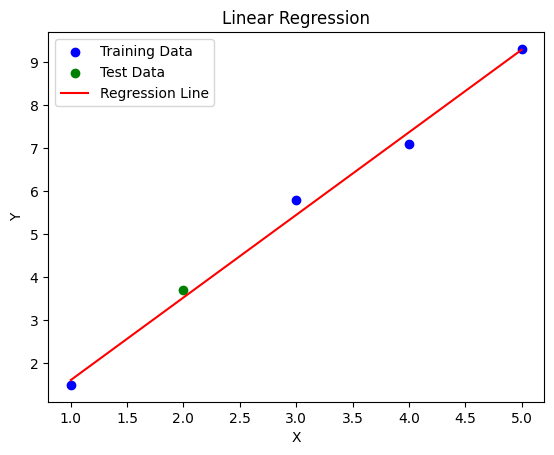

In [22]:
plt.scatter(X_train_2, y_train_2, color='blue', label='Training Data')
plt.scatter(X_test_2, y_test_2, color='green', label='Test Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [24]:
#Manual implementation
X_np = X.values.flatten()
Y_np = y.values

In [25]:
m = (len(X_np) * np.sum(X_np * Y_np) - np.sum(X_np) * np.sum(Y_np)) / \
    (len(X_np) * np.sum(X_np**2) - np.sum(X_np)**2)
b = (np.sum(Y_np) - m * np.sum(X_np)) / len(X_np)
# Output: m = 2.03, b = -0.53
# Why: Manually calculates the slope and intercept using the formulas:
# 𝑚=𝑁∑(𝑋𝑌)−∑(𝑋)∑(𝑌)/𝑁∑(𝑋^2)−(∑(𝑋))^2
# b= ∑(Y)−m∑(X)\N

In [26]:
Y_manual_pred = m * X_np + b

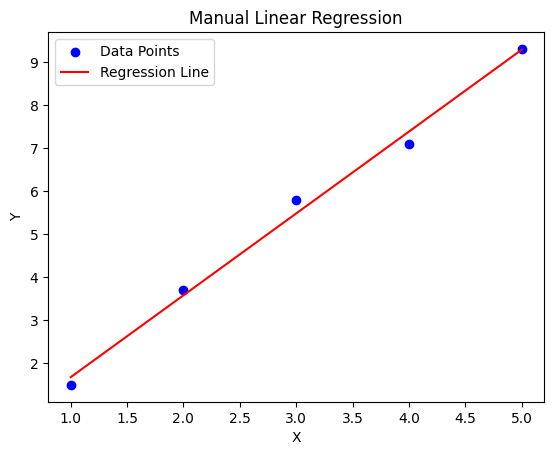

In [27]:
plt.scatter(X_np, Y_np, color='blue', label='Data Points')
plt.plot(X_np, Y_manual_pred, color='red', label='Regression Line')
plt.title('Manual Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
